In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [4]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False, gamma=1, theta_0=0, dimension=1):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta_0 = theta_0
        self.dimension = dimension
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )b
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        y = y.reshape(-1, 1)
        self.lambda_ = np.random.randn(X.shape[0], 1)
        self.support_vector_number_list = []
        self.L_lambda_list = []
        self.accuracy_score_list = []
        if self.kernel == 'linear':
            self.kernel = self._compute_kernel
        if self.kernel == 'poly':
            self.kernel = self._compute_poly_kernel
        
        for i in range(self.iter):
            self.lambda_ = self._gradient_ascent(X, y)
            self.support_vector_number_list.append(len(np.where(self.lambda_ > self.threshold)[0]))
            L_lambda = self._compute_L_lambda(X, y, self.lambda_)
            self.L_lambda_list.append(L_lambda)
            if self.verbose == True:
                print(len(np.where(self.lambda_ > self.threshold)[0]))
            self.support_vector_X = X[np.where(self.lambda_ > self.threshold)[0]]
            self.support_vector_y = y[np.where(self.lambda_ > self.threshold)[0]]
            self.support_vector_lambda_ = self.lambda_[np.where(self.lambda_ > self.threshold)[0]]
        
            if X_val is not None and y_val is not None:
                y_pred_val = self.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred_val)
                self.accuracy_score_list.append(accuracy)
        
        return self.support_vector_X, self.support_vector_lambda_

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        y_pred_tmp = np.dot(self.kernel(X, self.support_vector_X).T, (self.support_vector_lambda_*self.support_vector_y))
        y_pred = np.where(y_pred_tmp >= 0, 1, np.unique(y)[np.unique(y) != 1][0])
        
        return y_pred
    
    def _compute_kernel(self, X_i, X_j):
        result = np.dot(X_j, X_i.T)
        
        return result
    
    def _gradient_ascent(self, X, y):
        
        self.lambda_ += self.lr*(1 - y*np.dot(self.kernel(X, X).T, self.lambda_*y))
        self.lambda_[self.lambda_ < 0] = 0
        
        return self.lambda_
    
    def _compute_poly_kernel(self, X_i, X_j):
        result = ((self.gamma*(np.dot(X_j, X_i.T))) + self.theta_0)**self.dimension
        
        return result
    
    def _compute_L_lambda(self, X, y, lambda_):
        L_lambda = np.sum(lambda_) - np.dot((np.dot(np.dot(X, X.T).T, lambda_*y)).T, lambda_*y)/2
        
        return L_lambda

# 【問題1】ラグランジュの未定乗数法による最急降下

class ScratchSVMClassifier()に下記コードを追加
```python
def _compute_kernel(self, X_i, X_j):
    result = np.dot(X_j, X_i.T)

    return result

def _gradient_ascent(self, X, y):

    self.lambda_ += self.lr*(1 - y*np.dot(self.kernel(X, X).T, self.lambda_*y))
    self.lambda_[self.lambda_ < 0] = 0

    return self.lambda_

def _compute_poly_kernel(self, X_i, X_j):
    result = ((self.gamma*(np.dot(X_j, X_i.T))) + self.theta_0)**self.dimension

    return result

def _compute_L_lambda(self, X, y, lambda_):
    L_lambda = np.sum(lambda_) - np.dot((np.dot(np.dot(X, X.T).T, lambda_*y)).T, lambda_*y)/2

    return L_lambda
```

# 【問題2】サポートベクターの決定

class ScratchSVMClassifier()に下記コードを追加
```python
def fit(self, X, y, X_val=None, y_val=None):
    """
    SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        訓練データの特徴量
    y : 次の形のndarray, shape (n_samples, )b
        訓練データの正解値
    X_val : 次の形のndarray, shape (n_samples, n_features)
        検証データの特徴量
    y_val : 次の形のndarray, shape (n_samples, )
        検証データの正解値
    """
    y = y.reshape(-1, 1)
    self.lambda_ = np.random.randn(X.shape[0], 1)
    self.support_vector_number_list = []
    self.L_lambda_list = []
    self.accuracy_score_list = []
    if self.kernel == 'linear':
        self.kernel = self._compute_kernel
    if self.kernel == 'poly':
        self.kernel = self._compute_poly_kernel

    for i in range(self.iter):
        self.lambda_ = self._gradient_ascent(X, y)
        self.support_vector_number_list.append(len(np.where(self.lambda_ > self.threshold)[0]))
        L_lambda = self._compute_L_lambda(X, y, self.lambda_)
        self.L_lambda_list.append(L_lambda)
        if self.verbose == True:
            print(len(np.where(self.lambda_ > self.threshold)[0]))
        self.support_vector_X = X[np.where(self.lambda_ > self.threshold)[0]]
        self.support_vector_y = y[np.where(self.lambda_ > self.threshold)[0]]
        self.support_vector_lambda_ = self.lambda_[np.where(self.lambda_ > self.threshold)[0]]

        if X_val is not None and y_val is not None:
            y_pred_val = self.predict(X_val)
            accuracy = accuracy_score(y_val, y_pred_val)
            self.accuracy_score_list.append(accuracy)

    return self.support_vector_X, self.support_vector_lambda_
```

# 【問題3】推定

class ScratchSVMClassifier()に下記コードを追加
```python
def predict(self, X):
    """
    SVM分類器を使いラベルを推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        SVM分類器による推定結果
    """
    y_pred_tmp = np.dot(self.kernel(X, self.support_vector_X).T, (self.support_vector_lambda_*self.support_vector_y))
    y_pred = np.where(y_pred_tmp >= 0, 1, np.unique(y)[np.unique(y) != 1][0])
```

## サンプルをカーネル関数によって写像したものと各サポートベクターとの内積の合計が正か負かで分類している？→サポートベクターによって決定領域が一つに決まるなら、その決定領域との内積？

# 【問題4】学習と推定

In [5]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=0)

In [7]:
ss = StandardScaler()

In [8]:
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)

In [10]:
scr_svm = ScratchSVMClassifier(1000, 0.001, verbose=True)
svm = SVC()

In [11]:
scr_svm.fit(X_train, y_train, X_val, y_val)

191
158
130
119
100
88
82
77
72
70
66
65
61
57
55
53
50
45
44
39
36
36
36
36
36
34
33
32
32
31
29
28
28
28
27
27
25
25
25
23
23
23
23
20
20
20
19
19
19
19
19
18
18
18
18
18
17
17
17
16
16
16
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
14
14
14
14
14
13
13
12
10
10
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
1

(array([[ 0.17935757, -0.7678184 ],
        [ 0.23270469, -0.57182363],
        [ 0.85816398, -0.04470756],
        [ 0.19692878, -0.76408913],
        [ 0.96444134,  0.01321023],
        [-0.65661547,  0.15883145],
        [ 0.27495775, -0.66792288],
        [ 0.33139791, -0.38236903],
        [ 0.16621166, -0.60610143],
        [-0.92081691, -0.06873605],
        [ 0.7237211 , -0.74066109],
        [ 0.78609542, -0.16849926],
        [-0.94838137, -0.12687673],
        [-0.14980018, -1.44291129]]), array([[0.0155667 ],
        [0.08493777],
        [0.03715592],
        [0.01080963],
        [0.00853232],
        [0.09031043],
        [0.0149634 ],
        [0.14928386],
        [0.10357925],
        [0.0764861 ],
        [0.16080822],
        [0.00404821],
        [0.82035239],
        [0.50328633]]))

In [12]:
L_lambda_list_for_plot = []
for i in scr_svm.L_lambda_list:
    L_lambda_list_for_plot.append(i[0][0])

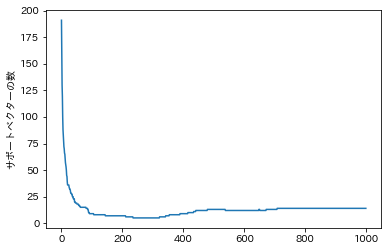

In [13]:
plt.plot(scr_svm.support_vector_number_list)
plt.ylabel('サポートベクターの数')
plt.show()

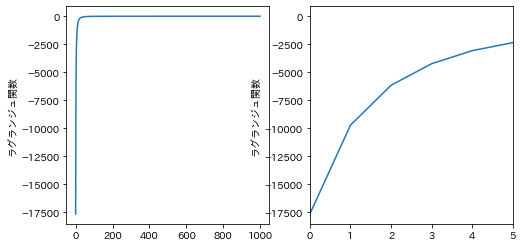

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(L_lambda_list_for_plot)
ax[1].plot(L_lambda_list_for_plot)
ax[1].set_xlim(0,5)
ax[0].set_ylabel('ラグランジュ関数')
ax[1].set_ylabel('ラグランジュ関数')
plt.show()

In [39]:
L_lambda_list_for_plot[400: 450]

[0.5418750183486878,
 0.5445172537490275,
 0.5471399123285747,
 0.5497431926229304,
 0.5523272910531645,
 0.5548924019491259,
 0.5574387175724898,
 0.5599664281395467,
 0.5624757218437326,
 0.5649667848779067,
 0.5674398014563777,
 0.5698949539281752,
 0.5723324253866906,
 0.5747523991763763,
 0.5771550618962962,
 0.5795406055118486,
 0.5817758235053856,
 0.5836910275557299,
 0.5855966944065409,
 0.5874929125432713,
 0.5893797695243961,
 0.5912573519920024,
 0.5931257456822543,
 0.594985035435732,
 0.5968353052076403,
 0.5986766380779063,
 0.6005091162611413,
 0.6023328211164964,
 0.6041478331573904,
 0.6059542320611246,
 0.6077520975796087,
 0.6095415126263655,
 0.6113225607626769,
 0.6130953246326827,
 0.6148598859742187,
 0.6166163256534911,
 0.618364724434332,
 0.6201051628308418,
 0.6218377204162384,
 0.6235624758354217,
 0.625279506817358,
 0.62698889018729,
 0.6286907018787558,
 0.6303850169454461,
 0.6320719095728806,
 0.6337514530899138,
 0.6354237199800792,
 0.637088781892765

## サポートベクターが増えているが、ラグランジュ関数も増えているので学習できている

In [16]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred_scr = scr_svm.predict(X_val)
y_pred = svm.predict(X_val)

In [18]:
accuracy_score(y_val, y_pred_scr)

1.0

In [19]:
accuracy_score(y_val, y_pred)

1.0

# 【問題5】決定領域の可視化

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='X_1', ylabel='X_2', 
                    target_names=['-1', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.support_vector_X[:, 0], model.support_vector_X[:, 1], color='yellow')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

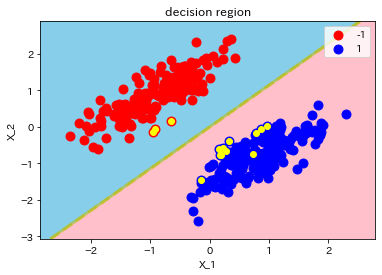

In [21]:
decision_region(X_train, y_train, scr_svm)

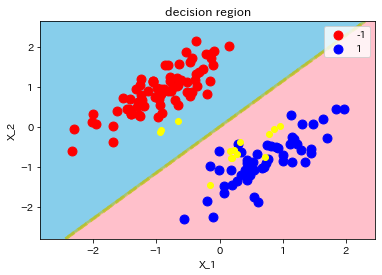

In [22]:
decision_region(X_val, y_val, scr_svm)

## 閾値を1e-1に変更してみる

In [23]:
scr_svm_threshold = ScratchSVMClassifier(1000, 0.003, verbose=True, threshold=1e-1)

In [24]:
scr_svm_threshold.fit(X_train, y_train)

169
80
62
47
39
36
31
29
23
23
23
23
22
21
18
18
18
18
17
16
15
15
15
15
15
15
14
12
12
12
11
11
10
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8

(array([[ 0.17935757, -0.7678184 ],
        [ 0.23270469, -0.57182363],
        [-0.65661547,  0.15883145],
        [ 0.33139791, -0.38236903],
        [ 0.16621166, -0.60610143],
        [-0.92081691, -0.06873605],
        [-0.94838137, -0.12687673],
        [ 0.44837058, -0.55308565]]), array([[0.35307138],
        [0.29898218],
        [0.26181132],
        [0.55634257],
        [0.39112249],
        [0.16786455],
        [0.2696251 ],
        [0.46497165]]))

In [25]:
L_lambda_list_for_plot_threshold = []
for i in scr_svm_threshold.L_lambda_list:
    L_lambda_list_for_plot_threshold.append(i[0][0])

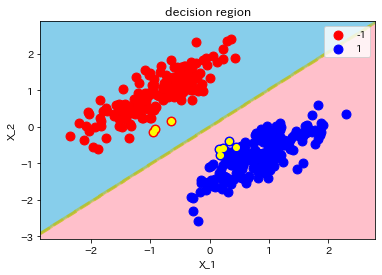

In [26]:
decision_region(X_train, y_train, scr_svm_threshold)

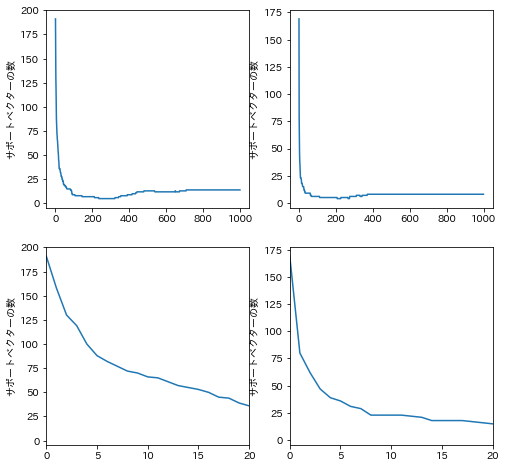

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].plot(scr_svm.support_vector_number_list)
ax[0, 1].plot(scr_svm_threshold.support_vector_number_list)
ax[1, 0].plot(scr_svm.support_vector_number_list)
ax[1, 1].plot(scr_svm_threshold.support_vector_number_list)
ax[1, 0].set_xlim(0,20)
ax[1, 1].set_xlim(0,20)
ax[0, 0].set_ylabel('サポートベクターの数')
ax[0, 1].set_ylabel('サポートベクターの数')
ax[1, 0].set_ylabel('サポートベクターの数')
ax[1, 1].set_ylabel('サポートベクターの数')
plt.show()

## 閾値を上げることでぶれは少なくなった。

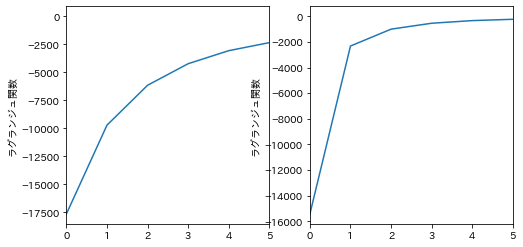

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(L_lambda_list_for_plot)
ax[0].set_xlim(0,5)
ax[1].plot(L_lambda_list_for_plot_threshold)
ax[1].set_xlim(0,5)
ax[0].set_ylabel('ラグランジュ関数')
ax[1].set_ylabel('ラグランジュ関数')
plt.show()

## 閾値を上げると収束が早くなると想像していたが、あまり変化がなかった

# 【問題6】（アドバンス課題）多項式カーネル関数の作成

In [29]:
scr_svm_poly = ScratchSVMClassifier(num_iter=500, lr=0.001, kernel='poly', threshold=1e-5, verbose=True, 
                                    gamma=1, theta_0=1, dimension=2)

In [30]:
scr_svm_poly.fit(X_train, y_train)

189
136
94
79
67
60
56
52
49
43
39
37
34
34
34
31
28
27
24
24
24
23
21
21
20
20
20
18
17
17
17
16
15
15
15
15
15
15
15
15
15
14
13
13
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
14
14
14
14
14
14
14
14
14
14
15
15
15
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
24
24
24
24
24
25
25
25
26
26
26
26
26
26
26
26
26
27
27
2

(array([[ 0.17935757, -0.7678184 ],
        [-0.2481112 ,  1.0420685 ],
        [ 0.23270469, -0.57182363],
        [ 0.70130251, -0.82042864],
        [ 0.85816398, -0.04470756],
        [-0.118845  ,  0.99005631],
        [ 0.19692878, -0.76408913],
        [-0.13614796,  1.12822431],
        [ 0.96444134,  0.01321023],
        [-0.65661547,  0.15883145],
        [ 0.27495775, -0.66792288],
        [ 0.28397663, -0.90697048],
        [ 0.00476129,  1.34266093],
        [-0.20268726,  0.9955228 ],
        [ 0.33139791, -0.38236903],
        [ 0.16621166, -0.60610143],
        [-0.92081691, -0.06873605],
        [ 0.78609542, -0.16849926],
        [-0.94838137, -0.12687673],
        [-0.59427107,  0.8100693 ],
        [ 0.43230461,  1.89441658],
        [ 1.82415033,  0.59759335],
        [-0.13259758,  1.17642339],
        [-0.30041852,  0.72608763]]), array([[0.00983534],
        [0.00028504],
        [0.03848796],
        [0.10503699],
        [0.0193379 ],
        [0.04051665],
   

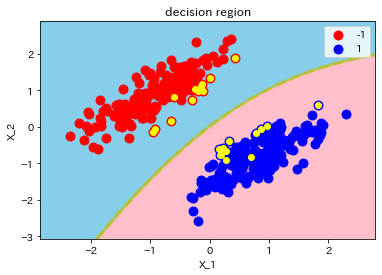

In [31]:
decision_region(X_train, y_train, scr_svm_poly)

In [32]:
L_lambda_list_for_plot_poly = []
for i in scr_svm_poly.L_lambda_list:
    L_lambda_list_for_plot_poly.append(i[0][0])

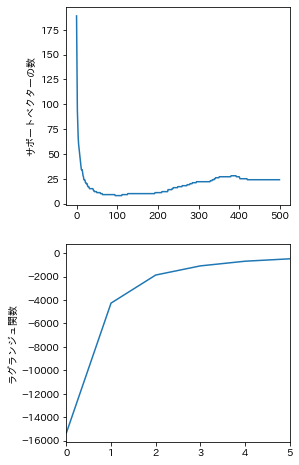

In [33]:
fig, ax = plt.subplots(2, 1, figsize=(4, 8))
ax[0].plot(scr_svm_poly.support_vector_number_list)
ax[1].plot(L_lambda_list_for_plot_poly)
ax[1].set_xlim(0,5)
ax[0].set_ylabel('サポートベクターの数')
ax[1].set_ylabel('ラグランジュ関数')
plt.show()

In [34]:
scr_svm_poly_4 = ScratchSVMClassifier(num_iter=500, lr=0.0001, kernel='poly', threshold=1e-5, verbose=True, 
                                    gamma=1, theta_0=1, dimension=4)

In [35]:
scr_svm_poly_4.fit(X_train, y_train)

195
151
121
100
92
87
82
76
70
66
61
59
55
53
51
49
49
46
45
45
44
44
43
41
38
36
36
36
36
34
33
33
33
33
32
32
31
31
30
30
29
29
29
29
28
28
27
27
27
27
27
27
27
27
27
27
25
25
24
24
24
24
24
24
24
24
24
24
23
23
23
23
23
23
23
23
23
23
23
23
23
23
22
22
22
21
20
20
20
18
17
17
17
17
17
16
16
16
15
15
15
15
15
15
15
15
15
15
15
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
12
12
12
12
12
12
12
12
12
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


(array([[ 0.81871567, -0.34649058],
        [-0.27900559,  1.02080175],
        [-0.118845  ,  0.99005631],
        [ 0.31003036, -0.79112489],
        [-0.94934478,  0.46054248],
        [ 0.33139791, -0.38236903],
        [ 0.16621166, -0.60610143],
        [-0.94838137, -0.12687673]]), array([[0.29526702],
        [0.08964995],
        [0.19751333],
        [0.66694393],
        [0.04896672],
        [0.17151711],
        [0.45195894],
        [0.42268353]]))

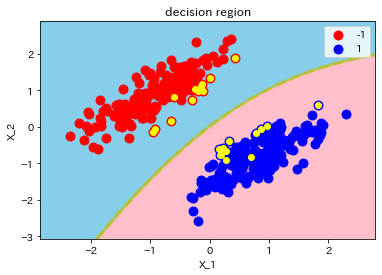

In [36]:
decision_region(X_train, y_train, scr_svm_poly)

In [37]:
L_lambda_list_for_plot_poly_4 = []
for i in scr_svm_poly_4.L_lambda_list:
    L_lambda_list_for_plot_poly_4.append(i[0][0])

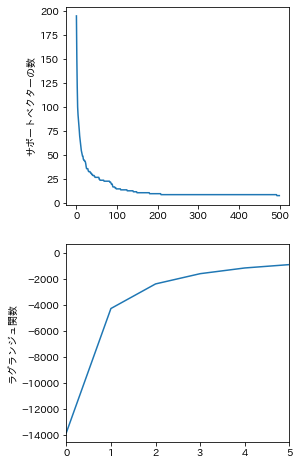

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(4, 8))
ax[0].plot(scr_svm_poly_4.support_vector_number_list)
ax[1].plot(L_lambda_list_for_plot_poly_4)
ax[1].set_xlim(0,5)
ax[0].set_ylabel('サポートベクターの数')
ax[1].set_ylabel('ラグランジュ関数')
plt.show()

## SVMは非線形の写像を行い、写像先を扱うので、ロジスティック回帰とは違い、非線形の分類を行うことができる